## TASK : Build an agent with memory - user query->groq->answer

In [14]:
from typing import TypedDict, List
from langgraph.graph import  StateGraph, START,END,MessagesState
from langchain_groq import ChatGroq
from langchain_core.messages import HumanMessage
from langgraph.checkpoint.memory import MemorySaver
import os
from dotenv import load_dotenv

load_dotenv()



True

## define the llm

In [15]:
groq_model = ChatGroq(
    model="llama-3.1-8b-instant",
    temperature=0.2,
    api_key=os.getenv("GROQ_API_KEY")
)

## build the node function

In [20]:
def ask_groq(state:MessagesState)->MessagesState:
  response = groq_model.invoke(state["messages"])
  print(f'Me : {state["messages"][-1]}')
  return {"messages": response}


## Build the graph

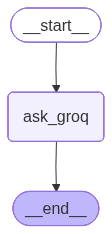

In [21]:
my_groq = StateGraph(MessagesState)
my_groq.add_node("ask_groq", ask_groq)
my_groq.add_edge(START, "ask_groq")
my_groq.add_edge("ask_groq", END)

# Add memory
memory = MemorySaver()
app = my_groq.compile(checkpointer=memory) 

app


## invoke the graph

In [22]:
user_input = input("Enter: ")
config={"configurable": {"thread_id": "1"}}
while user_input != "exit":
    state= app.invoke({"messages": [HumanMessage(content=user_input)]} , config=config)
    print({state["messages"][-1].pretty_print()})
    user_input = input("Enter: ")




Me : content='hello' additional_kwargs={} response_metadata={} id='a2fd78d3-97c1-4d76-abdb-edf4ecc3d882'
================================== Ai Message ==================================

Hello. How can I assist you today?
{None}
Me : content='Rachel from Israel' additional_kwargs={} response_metadata={} id='45dd1182-a5a0-43ba-961e-fd380baace7f'
================================== Ai Message ==================================

Shalom! Nice to meet you, Rachel from Israel. How are you today?
{None}
Me : content='nice to see , u know Hebrew !' additional_kwargs={} response_metadata={} id='09b526a9-9a76-46c4-bdfc-d977eb5c722c'
================================== Ai Message ==================================

I'm glad I could surprise you with a bit of Hebrew. I've been trained on many languages, including Hebrew. However, please keep in mind that my proficiency is limited to text-based conversations, and I may not be perfect in terms of grammar, vocabulary, or cultural nuances. But I'm happy